<a href="https://colab.research.google.com/github/lantisseverus/EDA_NetFlix/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Import and Environment Configuration

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
print(pd.read_csv('netflix_titles_nov_2019.csv').head())
df = pd.read_csv('netflix_titles_nov_2019.csv')

    show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
4  80213643                      Chip and Potato                         NaN   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country         date_added  release_year rating  \
0               South Korea  November 30, 2019          2019  TV-14   
1                       NaN  November 30

## Data Investigation

In [2]:
def data_inv(df):
  print('Data rows: ', df.shape[0])
  print('Data columns: ' ,df.shape[1])
  print('-' * 10)
  print('Column names: \n')
  print(df.columns)
  print('-' * 10)
  print('Data Type of each Column: \n')
  print(df.dtypes)
  print('-'* 10)
  print('Missing Values in each Column: \n')
  c = df.isnull().sum()
  print(c[c>0])

data_inv(df)

Data rows:  5837
Data columns:  12
----------
Column names: 

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')
----------
Data Type of each Column: 

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object
----------
Missing Values in each Column: 

director      1901
cast           556
country        427
date_added     642
rating          10
dtype: int64


## Data Cleaning


*   Drop ID column
*   Remove Duplicate Shows
*   Create New Column to count the number of cast of each show
*   Missing Country can be replaced by 'Other' country
*   Convert date_added data type from object to datetime
*   Replace missing date_added with Jan, 1st, {release_year}
*   Extract Month from {date_added} column








In [3]:
df = df.drop('show_id', axis = 1)

In [4]:
dups = df.duplicated(['title','country','type','release_year'])
print(df[dups].head())
df = df.drop_duplicates(['title','country','type','release_year'])

          title         director  \
1134  Kakegurui              NaN   
1741     Sarkar  A.R. Murugadoss   

                                                   cast country  \
1134  Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...   Japan   
1741  Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...   India   

         date_added  release_year rating   duration  \
1134            NaN          2019  TV-14  2 Seasons   
1741  March 2, 2019          2018  TV-MA    162 min   

                                              listed_in  \
1134  Anime Series, International TV Shows, TV Thril...   
1741   Action & Adventure, Dramas, International Movies   

                                            description     type  
1134  High roller Yumeko Jabami plans to clean house...  TV Show  
1741  A ruthless businessman’s mission to expose ele...    Movie  


Before count the cast number, we should filter out the NaN value in the cast and replace it with "Unknown". I will also replace the director name with "Unknown".

In [5]:
df['cast']=df['cast'].replace(np.nan,'Unknown')
df['director'] = df['director'].replace(np.nan, 'Unknown')

In [6]:
def cast_counter(cast):
    if cast=='Unknown':
        return 0
    else:
        lst=cast.split(', ')
        length=len(lst)
        return length
df['number of cast']=df['cast'].apply(cast_counter)
print(df.head())

                                 title                    director  \
0                            Chocolate                     Unknown   
1  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2                      The Zoya Factor             Abhishek Sharma   
3                            Atlantics                   Mati Diop   
4                      Chip and Potato                     Unknown   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country         date_added  release_year rating  \
0               South Korea  November 30, 2019          2019  TV-14   
1                       NaN  November 30, 2019          2019   TV-G   
2                     India  

In [7]:
df['country'] = df['country'].replace(np.nan, "Other")

In [8]:
df['date_added']= df['date_added'].fillna('January 1, {}'.format(str(df['release_year'].mode()[0])))
df['date_added'] = df['date_added'].astype('datetime64[ns]')
import datetime as dt
df['date_added_month'] = df['date_added'].dt.month
print(df.head())

                                 title                    director  \
0                            Chocolate                     Unknown   
1  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2                      The Zoya Factor             Abhishek Sharma   
3                            Atlantics                   Mati Diop   
4                      Chip and Potato                     Unknown   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country date_added  release_year rating   duration  \
0               South Korea 2019-11-30          2019  TV-14   1 Season   
1                     Other 2019-11-30          2019   TV-G     67 min   
2                   

## Exploratory Data Analysis


* Extract the numeric digits from the Movie and TV shows
*   Separate Movie and TV shows and understand their duration distribution
*   See if the number of release of shows/movie is increasing or decreasing with the year proceeds
* Understanding what content is available in different countries
* Understand the different trend of Movie and TV shows in years
* The most observed rating categories in TV-shows and Movies
* The cast number differs among the country
* How many content its release year differ from its year added
* The duration of Movie and TV shows fluctuation with the years added
* The duration of Movie and TV shows fluctuation with the years added(Movie was calculated by Minutes while TV shows were estimated by its Seasons)

In [9]:
movie_df = df[df["type"].str.contains("Movie")]
movie_df["length(min)"] = [int(val.split(' ')[0]) for val in movie_df['duration']]
# lengths = []
# for val in movie_df['duration']:
#   length = int(val.split(' ')[0])
#   lengths.append(length)
print(movie_df["length(min)"].describe())


count    3938.000000
mean       98.012951
std        27.703858
min         3.000000
25%        85.000000
50%        97.000000
75%       113.000000
max       312.000000
Name: length(min), dtype: float64


<ipython-input-9-a62150a9cad9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df["length(min)"] = [int(val.split(' ')[0]) for val in movie_df['duration']]


In [10]:
tvshow_df = df[df["type"].str.contains("TV Show")]
tvshow_df["length(season)"] = [int(val.split(' ')[0]) for val in tvshow_df['duration']]
print(tvshow_df["length(season)"].describe())

count    1897.000000
mean        1.800211
std         1.645426
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: length(season), dtype: float64


<ipython-input-10-1eb6f7cd6689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshow_df["length(season)"] = [int(val.split(' ')[0]) for val in tvshow_df['duration']]


In [11]:
df.groupby("type")["country"].value_counts().sort_values(ascending = False)


type     country                              
Movie    United States                            1375
         India                                     644
TV Show  United States                             532
         Other                                     257
         United Kingdom                            174
                                                  ... 
Movie    Italy, Turkey                               1
         Italy, Switzerland, France, Germany         1
         Italy, Switzerland, Albania, Poland         1
         Italy, India                                1
TV Show  United States, United Kingdom, Canada       1
Name: country, Length: 609, dtype: int64

The United States still dominates the number of content added to Netflix (both in TV shows and Movies).

In [12]:
df["year_added"] = df["date_added"].dt.year
df.groupby(["type", "year_added"]).count()
count_df = df.groupby(["type", "year_added"])["title"].count().reset_index(name="count")
#df["type_year_count"] = df["type"].map(df["year_added"].value_counts())
#print(df["type_year_count"])

<Axes: xlabel='year_added', ylabel='count'>

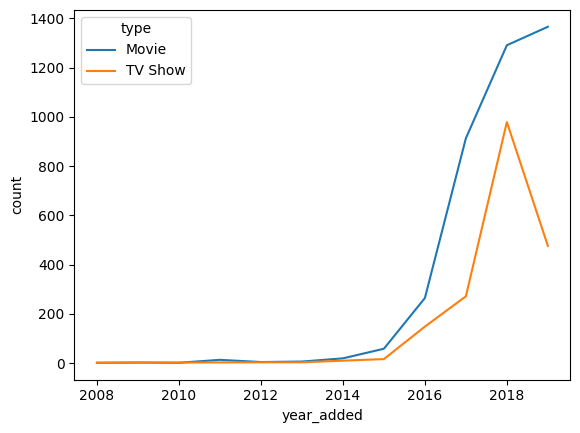

In [13]:
sns.lineplot(data=count_df, x="year_added", y="count", hue= "type")

We can tell from the line plot that there's a peak in 2018 for TV shows, while Movie keeps soaring even after 2019.

In [14]:
df["rating"].value_counts().sort_values(ascending= False)

TV-MA       1936
TV-14       1592
TV-PG        678
R            439
PG-13        227
NR           218
PG           160
TV-Y7        156
TV-G         147
TV-Y         139
TV-Y7-FV      92
G             32
UR             7
NC-17          2
Name: rating, dtype: int64

We can tell from the exploratory data analysis result that the most frequent rating of Netflix content are "TV-MA" and "TV-14".



*   TV-MA:This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
*   TV-14:This program contains some material that many parents would find unsuitable for children under 14 years of age.

This data result indicates that Netflix content target audience are mostly above 14-17 year-old teenagers.

In [15]:
df.groupby("country")["number of cast"].sum().sort_values(ascending=False)

country
United States                            12850
India                                     5114
Other                                     2041
Japan                                     1853
United Kingdom                            1625
                                         ...  
United Kingdom, Belgium, Sweden              0
United Kingdom,                              0
Canada, United Kingdom, Netherlands          0
France, United Kingdom, United States        0
West Germany                                 0
Name: number of cast, Length: 528, dtype: int64

From the aggregation result, we can tell that the United States has the most cast included in the contents, and the following are India, Other, Japan, and the United Kingdom.

In [16]:
df["year_diff"] =  df["year_added"] - df["release_year"]
print((df[df["year_diff"] != 0].value_counts().sum())/ (df.shape[0]) * 100)

67.95201371036846


The proportion of different release year and year added is around 67.95%.

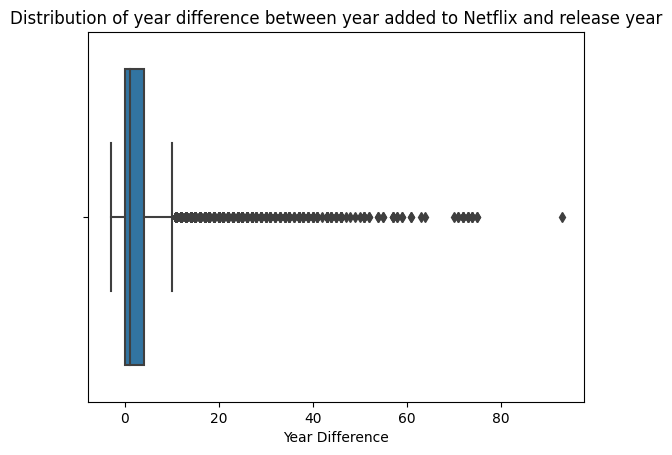

count    5835.000000
mean        4.195201
std         8.397445
min        -3.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        93.000000
Name: year_diff, dtype: float64
                           title  release_year  year_added
4                Chip and Potato          2019        2018
8               La Reina del Sur          2019        2018
49                     High Seas          2019        2018
51           Nailed It! Holiday!          2019        2018
56             The Dragon Prince          2019        2018
...                          ...           ...         ...
3263   Unbreakable Kimmy Schmidt          2019        2018
3264        Arrested Development          2019        2018
4575  Hans Teeuwen: Real Rancour          2018        2017
5274                 Tokyo Trial          2017        2016
5811                 Jack Taylor          2016        2013

[177 rows x 3 columns]


In [23]:
sns.boxplot(x = df["year_diff"])
plt.title("Distribution of year difference between year added to Netflix and release year")
plt.xlabel("Year Difference")
plt.show()
print(df["year_diff"].describe())
print(df[df["year_diff"] <0][["title", "release_year", "year_added"]])

There are 177 pieces of content added to Netflix earlier than the release year. What does this mean? It could be some of the movies on Netflix that are added to Netflix first and then released to the movie theater(e.g., *"Red Notice"*)

<ipython-input-24-55d8a2dd95c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df["year_added"] = movie_df["date_added"].dt.year


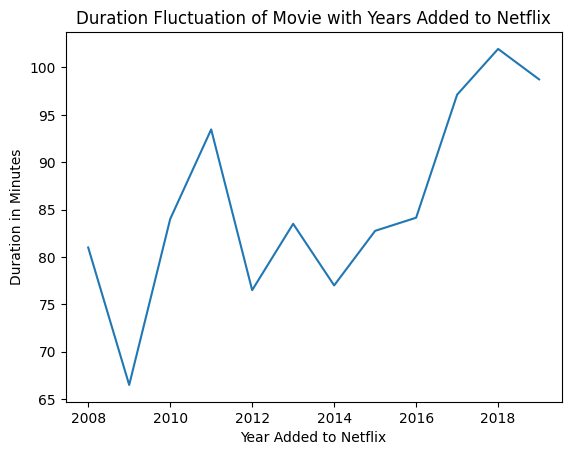

In [24]:
movie_df["year_added"] = movie_df["date_added"].dt.year
sns.lineplot(data=movie_df, x="year_added", y="length(min)", errorbar= None)
plt.title("Duration Fluctuation of Movie with Years Added to Netflix")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Duration in Minutes")
plt.show()

We can tell from the line plot that there seems to be a trend from 2014 to 2018 that the duration of Movie keeps increasing.

<ipython-input-21-d17afa2f5dea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshow_df["year_added"] = tvshow_df["date_added"].dt.year


<Axes: xlabel='year_added', ylabel='length(season)'>

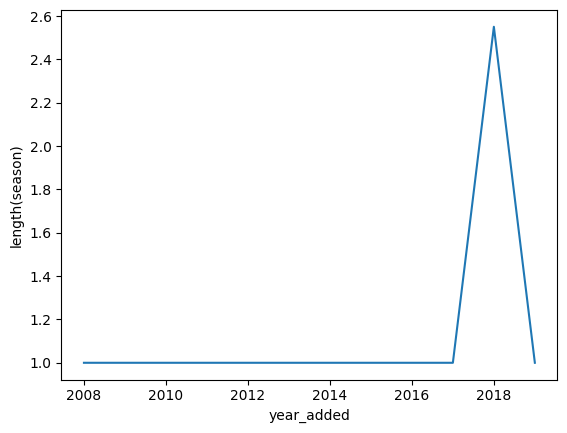

In [21]:
tvshow_df["year_added"] = tvshow_df["date_added"].dt.year
sns.lineplot(data=tvshow_df, x="year_added", y="length(season)", errorbar= None)

As for TV shows, most of the TV shows are of 1 season length, it was not until 2018 that the seasons of TV shows became more varied.

## Result & Limitation

It seems that most of the valid data reside between 2016-2019, and 2016 - 2019 was the years when Netflix expanded and gained more subscribers (See Reference from [demandsage](https://www.demandsage.com/netflix-subscribers/)).




The data analysis has some limitations on the contents which were
1.   aired in multiple countries, and this requires advanced text-extracting skills on the entries with multiple country names in one cell.

2.   limited to 2016 to 2019, when the period is too short to be representative.


Had had more information like the content genre, subscribers over years, views data, more insightful data analysis and statistics hypothesis could have been applied to this dataset.